In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import SymLogNorm, LogNorm
from astropy import units as u
import os
from lxml import etree
%matplotlib inline


In [3]:
def plot_skymap(file, name='skymap.png', title=None, xlabel='right ascension (deg)', 
                     ylabel='declination (deg)', figsize=(10, 10), fontsize=20, cmap='gist_heat'):
    # get map
    fig = plt.figure(figsize=figsize) 
    ax = plt.subplot(projection=wcs)
    img = plt.imshow(skymap, norm=SymLogNorm(1), interpolation='gaussian', cmap=cmap)
    ax.coords[0].set_format_unit(u.deg)
    ax.coords[1].set_format_unit(u.deg)
    cb = plt.colorbar(img, ax=ax)
    # axis
    ax.tick_params(axis='both', labelsize=fontsize)
    cb.ax.tick_params(labelsize=fontsize) 
    cb.set_label('counts', fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(color='grey', ls='solid')
    fig.tight_layout()
    return 

#crab_skymap = '../data/crab_test_sky_2.fits'
#plot_fits_skymap(file=bkg_skymap, name=crab_skymap.replace('.fits', '.png'), figsize=(6, 6), fontsize=15)

In [7]:
#dataset upload
data_folder = '..\\data'
xml_folder = '..\\models\\test'
dataset = []
for crab_skymap in os.listdir(data_folder):
    with fits.open((os.path.join(data_folder, crab_skymap))) as hdul:
        wcs = WCS(hdul[0].header)
        dataset.append((hdul[0].data.astype('int8'),wcs))
        
i = 0
for xml_file in os.listdir(xml_folder):
    tree = etree.parse((os.path.join(xml_folder, xml_file)))
    root = tree.getroot()
    Ra = root[0][1][0].get("value")
    Dec = root[0][1][1].get("value")
    dataset[i] +=((Ra,Dec),)  
    i+=1
    
    

In [4]:
print(dataset)

[(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8), WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---CAR'  'DEC--CAR'  
CRVAL : 83.6331  22.5145  
CRPIX : 250.5  250.5  
NAXIS : 500  500, ('81.338', '23.3624')), (array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8), WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---CAR'  'DEC--CAR'  
CRVAL : 83.6331  22.5145  
CRPIX : 250.5  250.5  
NAXIS : 500  500, ('82.7909', '18.7344')), (array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8), WCS Keywords

Numbe

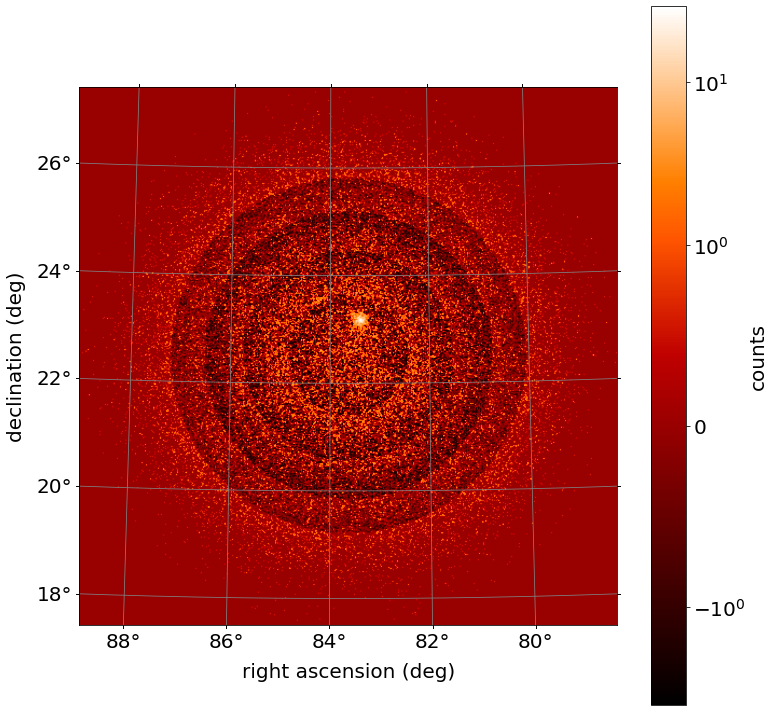

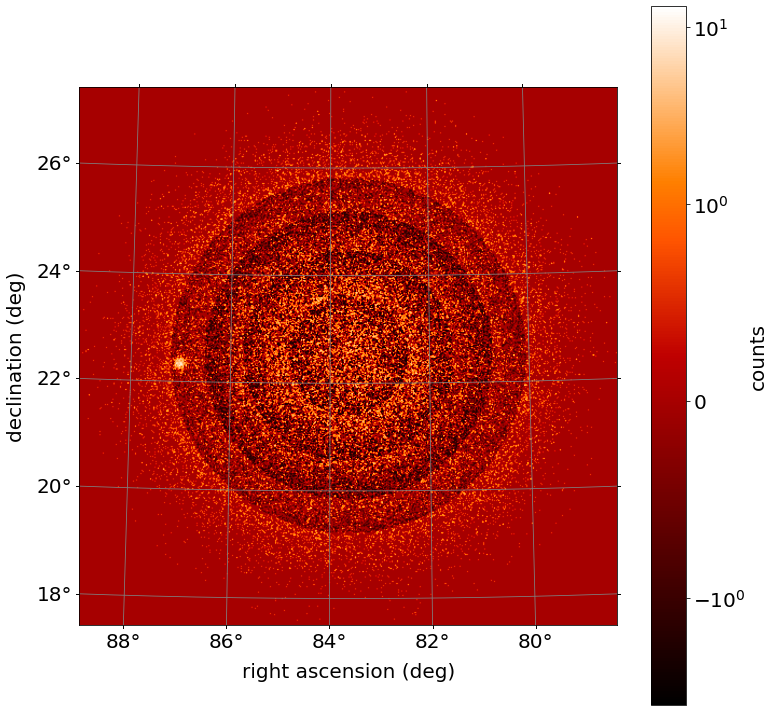

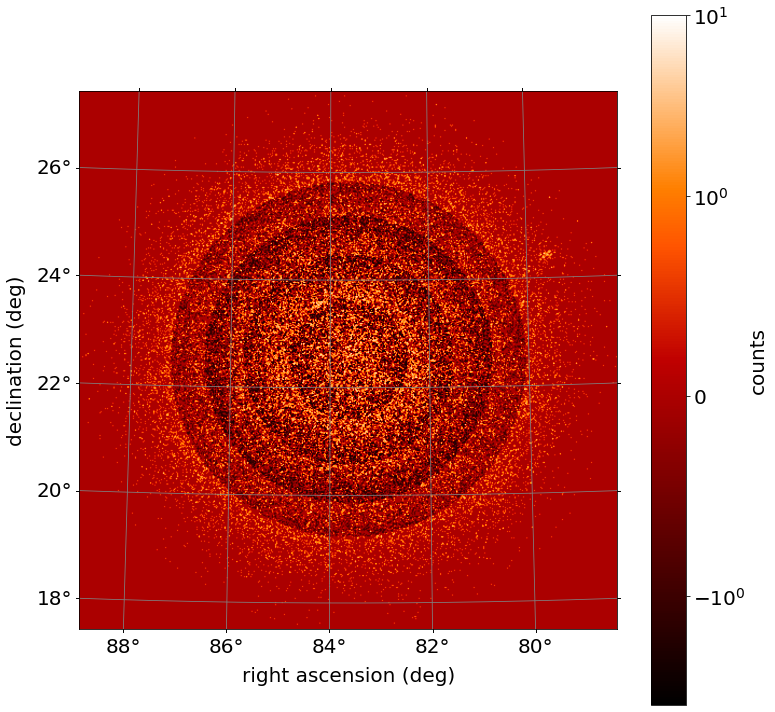

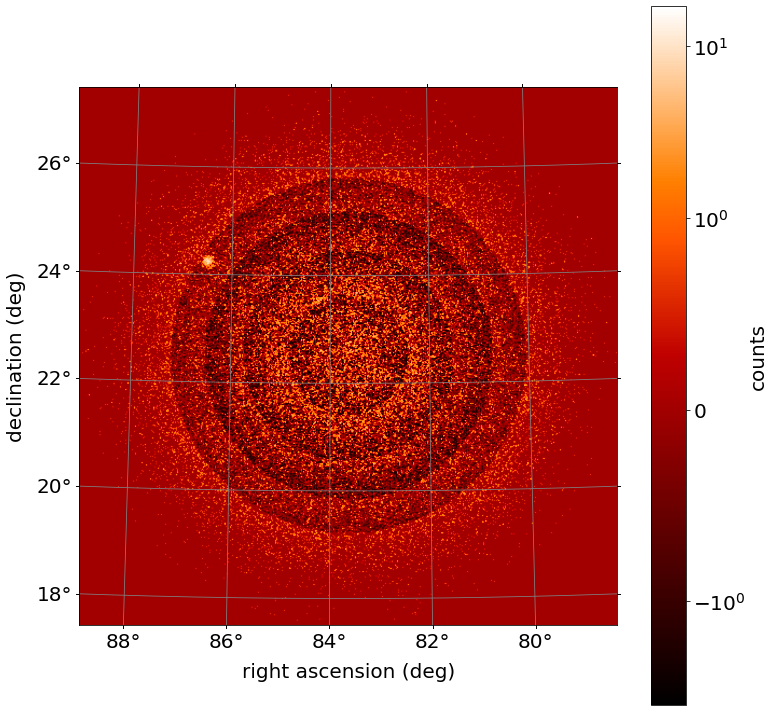

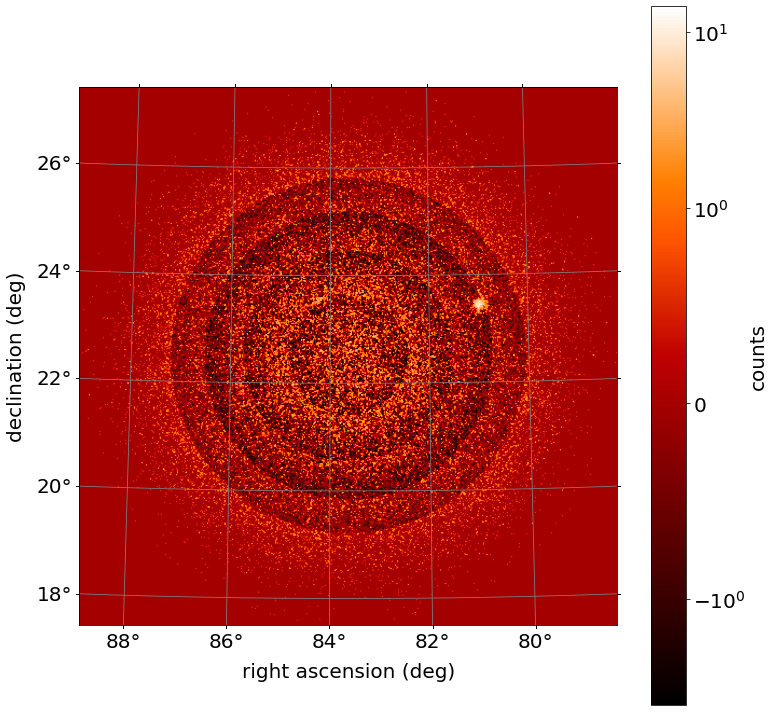

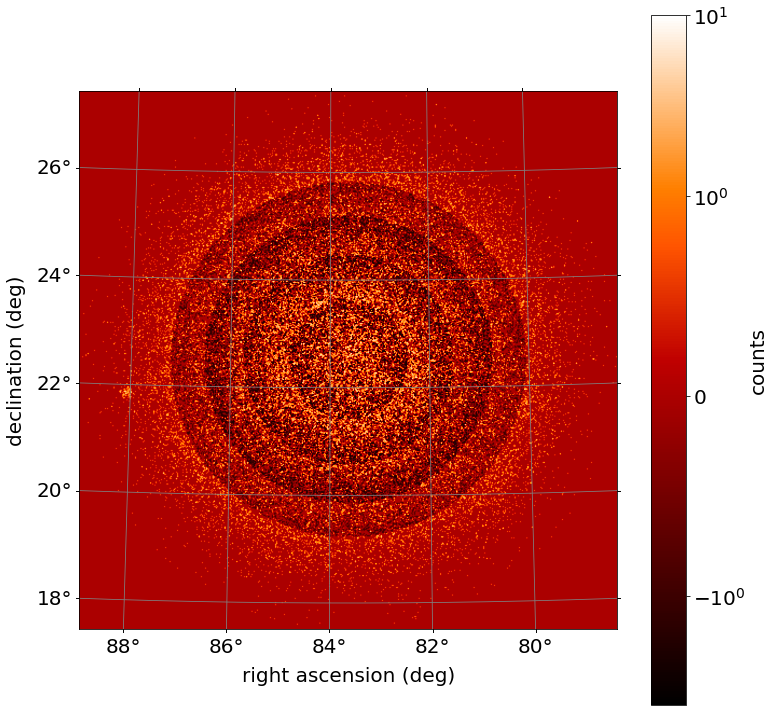

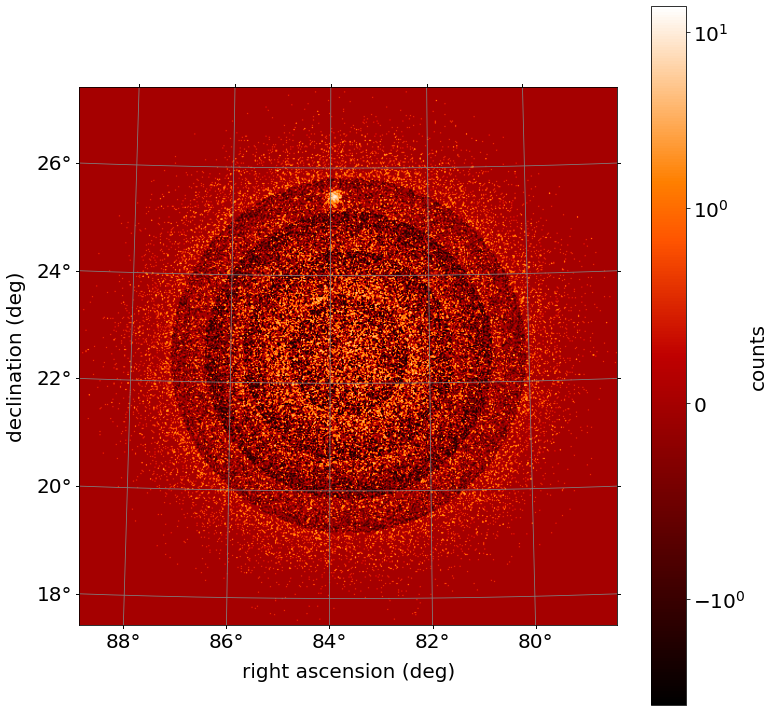

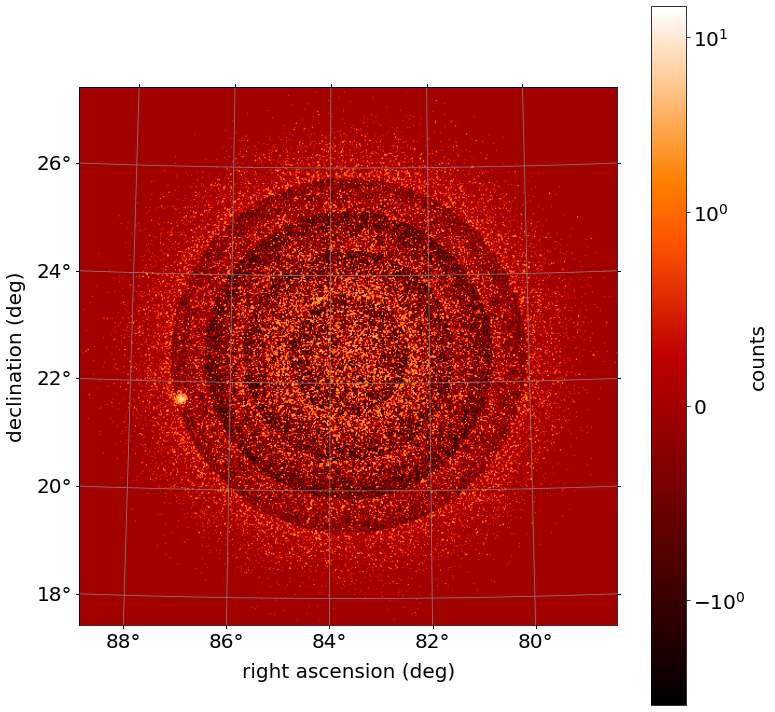

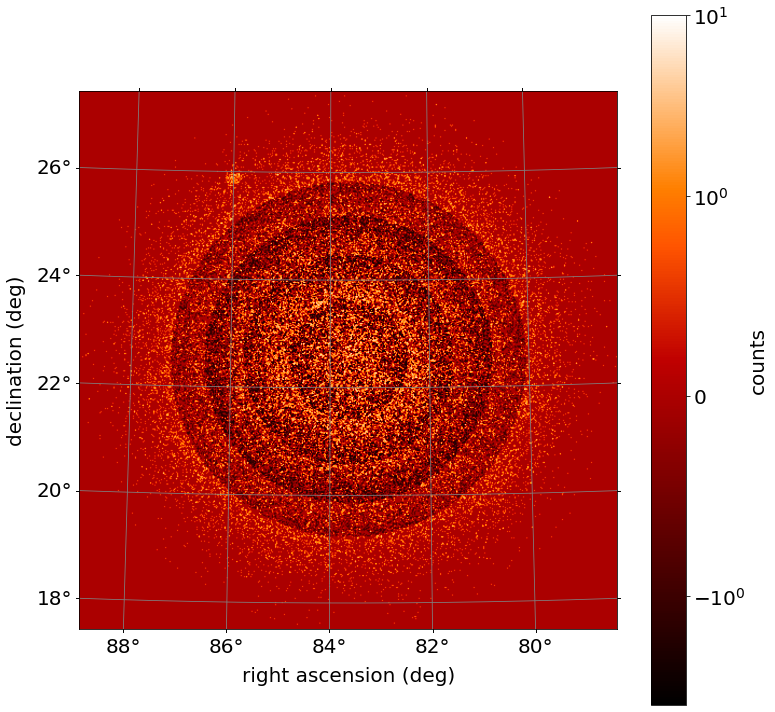

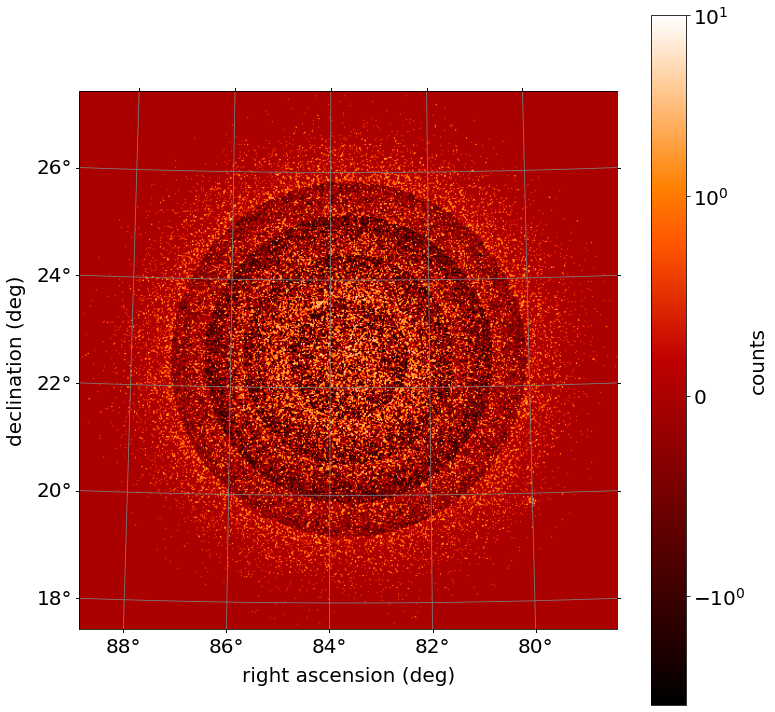

In [5]:
for skymap,wcs,source_position in dataset:
    plot_skymap(skymap)
    

In [8]:
#argmax on original image

skymap = dataset[1][0]

gamma_ray_coordinates = np.unravel_index(np.argmax(skymap), skymap.shape)

print(gamma_ray_coordinates)

px,py = gamma_ray_coordinates

sky = dataset[1][1].pixel_to_world(px,py)
print(sky)  

(240, 93)
<SkyCoord (ICRS): (ra, dec) in deg
    (83.83421729, 19.38437231)>


In [9]:
#image binarization
threshold = 100
for threshold in range(0,5,1):
    binary_skymap = np.copy(skymap)
    binary_skymap[skymap <= threshold] = 255
    binary_skymap[skymap > threshold] = 0
    
    
    skymap_filtered = cv2.medianBlur(binary_skymap, 3)

    plt.figure(figsize=(10,10))
    plt.imshow(skymap_filtered)
    plt.show()

# plot_skymap(skymap)
# plot_skymap(binary_skymap)


error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\smooth.cpp:5230: error: (-210:Unsupported format or combination of formats)  in function 'cv::medianBlur'


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(skymap)
plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:918: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'


In [ ]:
cv2.imwrite('skymap.jpg', skymap)
gray = cv2.imread("skymap.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(gray)
plt.show()